In [23]:
#Different Scenarios Analysis

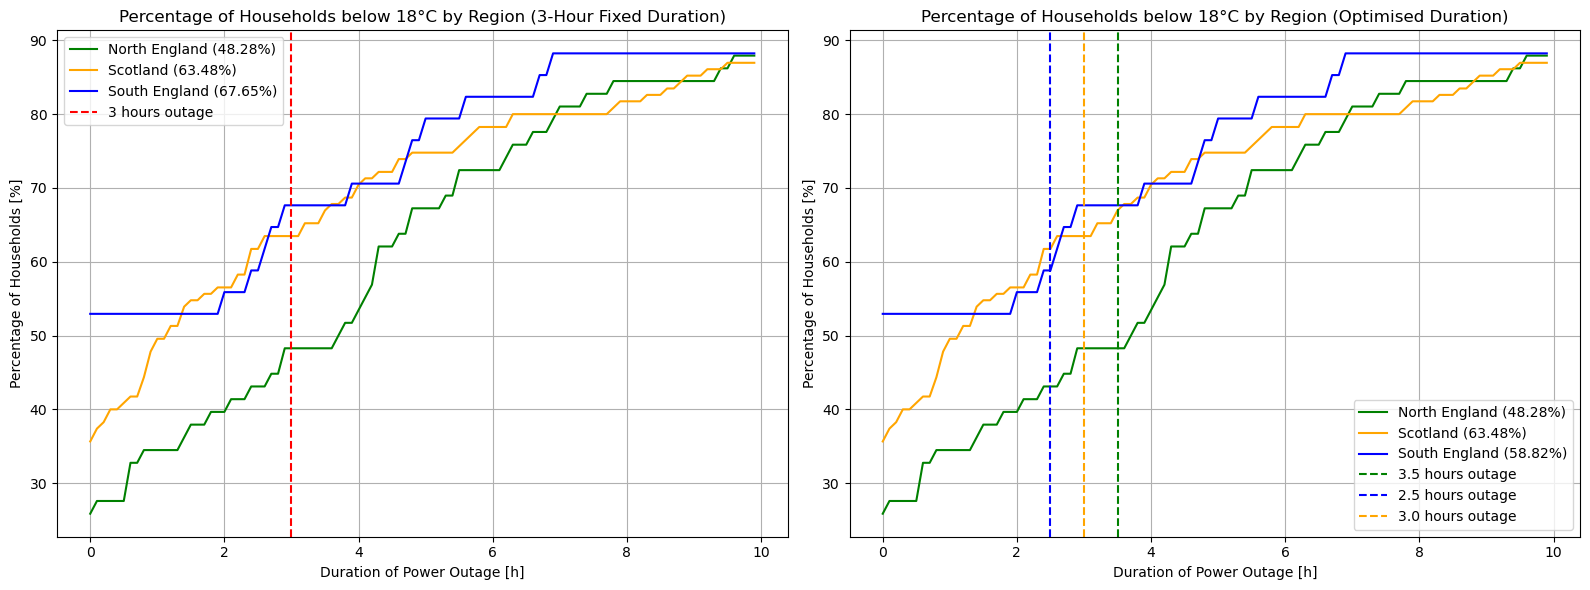

Fixed Duration Results:
The percentage of households in North England that fall below 18°C during a 3-hour power outage is approximately 48.28%.
The percentage of households in Scotland that fall below 18°C during a 3-hour power outage is approximately 63.48%.
The percentage of households in South England that fall below 18°C during a 3-hour power outage is approximately 67.65%.

Optimised Duration Results:
The percentage of households in North England that fall below 18°C during a 3.5-hour power outage is approximately 48.28%.
The percentage of households in Scotland that fall below 18°C during a 3.0-hour power outage is approximately 63.48%.
The percentage of households in South England that fall below 18°C during a 2.5-hour power outage is approximately 58.82%.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the Excel file
file_path = 'DATA_HOUSEHOLDS_BOX.xlsx'  # Update this path as needed
data = pd.read_excel(file_path)

# Simulation parameters
threshold = 18  # Temperature threshold in degrees Celsius
fixed_outage_duration = 3  # Fixed duration of the outage in hours
optimised_durations = {
    "North England": 3.5,
    "South England": 2.5,
    "Scotland": 3.0
}
time_steps = 10   # Maximum duration of the outage in hours (just for the plot)
dt = 0.1          # Time step in hours

# Create a time array
time = np.arange(0, time_steps, dt)

# Dictionary to store the percentages of households below the threshold for each region
region_percentages_fixed = {}
region_percentages_optimised = {}

# Group data by region
regions = data['Region_UK'].unique()

# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Define colours for each region
region_colours = {
    "North England": "green",
    "South England": "blue",
    "Scotland": "orange"
}

for region in regions:
    region_data = data[data['Region_UK'] == region]
    
    # List to store the percentage of houses falling below the threshold at each time
    percentage_below_threshold = []

    # Simulation for each time step
    for t in time:
        below_threshold_count = 0
        for index, row in region_data.iterrows():
            R = row['R']
            C = row['C']
            T_out = row['TEMP_EXT_COLDEST_R_5']
            T_in = row['MIN_TEMP_COLDEST_R_5'] 
           
            # Euler method to solve the differential equation
            for _ in np.arange(0, t, dt):
                dTdt = (T_out - T_in) / (R * C)
                T_in += dTdt * dt
            
            # Count if the temperature falls below the threshold
            if T_in < threshold:
                below_threshold_count += 1
        
        # Calculate the percentage of houses below the threshold
        percentage = (below_threshold_count / len(region_data)) * 100
        percentage_below_threshold.append(percentage)
    
    # Store the percentage for the fixed outage duration
    percentage_at_fixed_duration = np.interp(fixed_outage_duration, time, percentage_below_threshold)
    region_percentages_fixed[region] = percentage_at_fixed_duration

    # Plot the results for each region in the fixed duration subplot
    axs[0].plot(time, percentage_below_threshold, label=f'{region} ({percentage_at_fixed_duration:.2f}%)', color=region_colours[region])
    
    # Plot the results for each region in the optimised duration subplot
    optimised_duration = optimised_durations.get(region, fixed_outage_duration)
    percentage_at_optimised_duration = np.interp(optimised_duration, time, percentage_below_threshold)
    region_percentages_optimised[region] = percentage_at_optimised_duration
    axs[1].plot(time, percentage_below_threshold, label=f'{region} ({percentage_at_optimised_duration:.2f}%)', color=region_colours[region])

# First subplot: Fixed duration
axs[0].axvline(x=fixed_outage_duration, color='r', linestyle='--', label=f'{fixed_outage_duration} hours outage')
axs[0].set_xlabel('Duration of Power Outage [h]')
axs[0].set_ylabel('Percentage of Households [%]')
axs[0].set_title('Percentage of Households below 18°C by Region (3-Hour Fixed Duration)')
axs[0].legend()
axs[0].grid(True)

# Second subplot: Optimised durations
for region, optimised_duration in optimised_durations.items():
    axs[1].axvline(x=optimised_duration, color=region_colours[region], linestyle='--', label=f'{optimised_duration} hours outage')
axs[1].set_xlabel('Duration of Power Outage [h]')
axs[1].set_ylabel('Percentage of Households [%]')
axs[1].set_title('Percentage of Households below 18°C by Region (Optimised Duration)')
axs[1].legend()
axs[1].grid(True)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('Percentages_Affected_regions.pdf')

# Show the plot
plt.show()

# Display the results for each region
print("Fixed Duration Results:")
for region, percentage in region_percentages_fixed.items():
    print(f'The percentage of households in {region} that fall below 18°C during a {fixed_outage_duration}-hour power outage is approximately {percentage:.2f}%.')

print("\nOptimised Duration Results:")
for region, percentage in region_percentages_optimised.items():
    optimised_duration = optimised_durations.get(region, fixed_outage_duration)
    print(f'The percentage of households in {region} that fall below 18°C during a {optimised_duration}-hour power outage is approximately {percentage:.2f}%.')


Average Discomfort by Region:
          Region  Fixed Duration (3 hours)  Optimised Duration
0  South England                  0.630028            0.502063
1       Scotland                  0.635092            0.635092
2  North England                  0.132000            0.293978


<Figure size 1000x600 with 0 Axes>

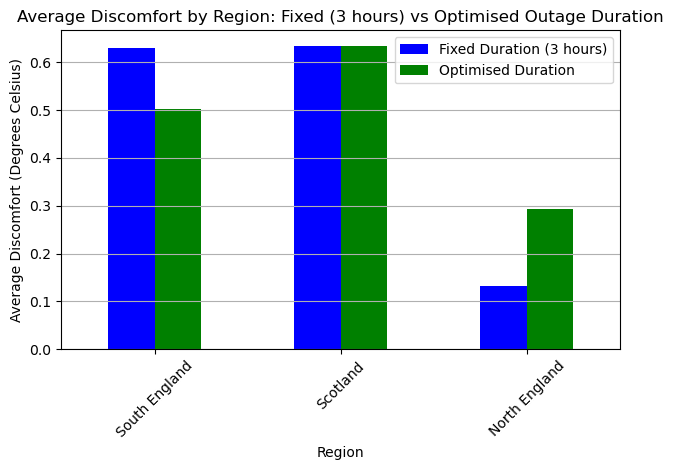

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the file
file_path = "temperature_evolution_no_heating_3.xlsx"
data = pd.read_excel(file_path)

# Define region and corresponding t values for optimised duration
optimised_t_columns = {
    'South England': 7,  # t=6 is the 8th column
    'Scotland': 8,       # t=7 is the 9th column (same as fixed)
    'North England': 9   # t=8 is the 10th column
}

# Fixed duration (t=7)
fixed_t_column = data.columns[8]  # Column I corresponds to t=7, which is the 9th column

# Calculate discomfort for fixed duration
data['Fixed_Discomfort'] = 18 - pd.to_numeric(data[fixed_t_column], errors='coerce')

# Initialize a dictionary to store average discomfort for both cases
average_discomfort = {
    'Region': [],
    'Fixed Duration (3 hours)': [],
    'Optimised Duration': []
}

# Calculate discomfort for optimised duration by region and store both results
for region, t_index in optimised_t_columns.items():
    region_data = data[data['Region_UK'] == region]
    
    # Fixed discomfort average
    fixed_avg = region_data['Fixed_Discomfort'].mean()
    
    # Optimised discomfort average
    optimised_discomfort = 18 - pd.to_numeric(region_data.iloc[:, t_index], errors='coerce')
    optimised_avg = optimised_discomfort.mean()
    
    # Store the results
    average_discomfort['Region'].append(region)
    average_discomfort['Fixed Duration (3 hours)'].append(fixed_avg)
    average_discomfort['Optimised Duration'].append(optimised_avg)

# Convert the dictionary to a DataFrame for easy printing and plotting
average_discomfort_df = pd.DataFrame(average_discomfort)

# Print the results
print("Average Discomfort by Region:")
print(average_discomfort_df)

# Plot the results
plt.figure(figsize=(10, 6))
average_discomfort_df.set_index('Region').plot(kind='bar', color=['blue', 'green'])
plt.title('Average Discomfort by Region: Fixed (3 hours) vs Optimised Outage Duration')
plt.xlabel('Region')
plt.ylabel('Average Discomfort (Degrees Celsius)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adjust layout to ensure everything fits into the figure area
plt.tight_layout()

# Save the plot to a PDF 
plt.savefig('Degrees_Discomfort.pdf', bbox_inches='tight')

plt.show()


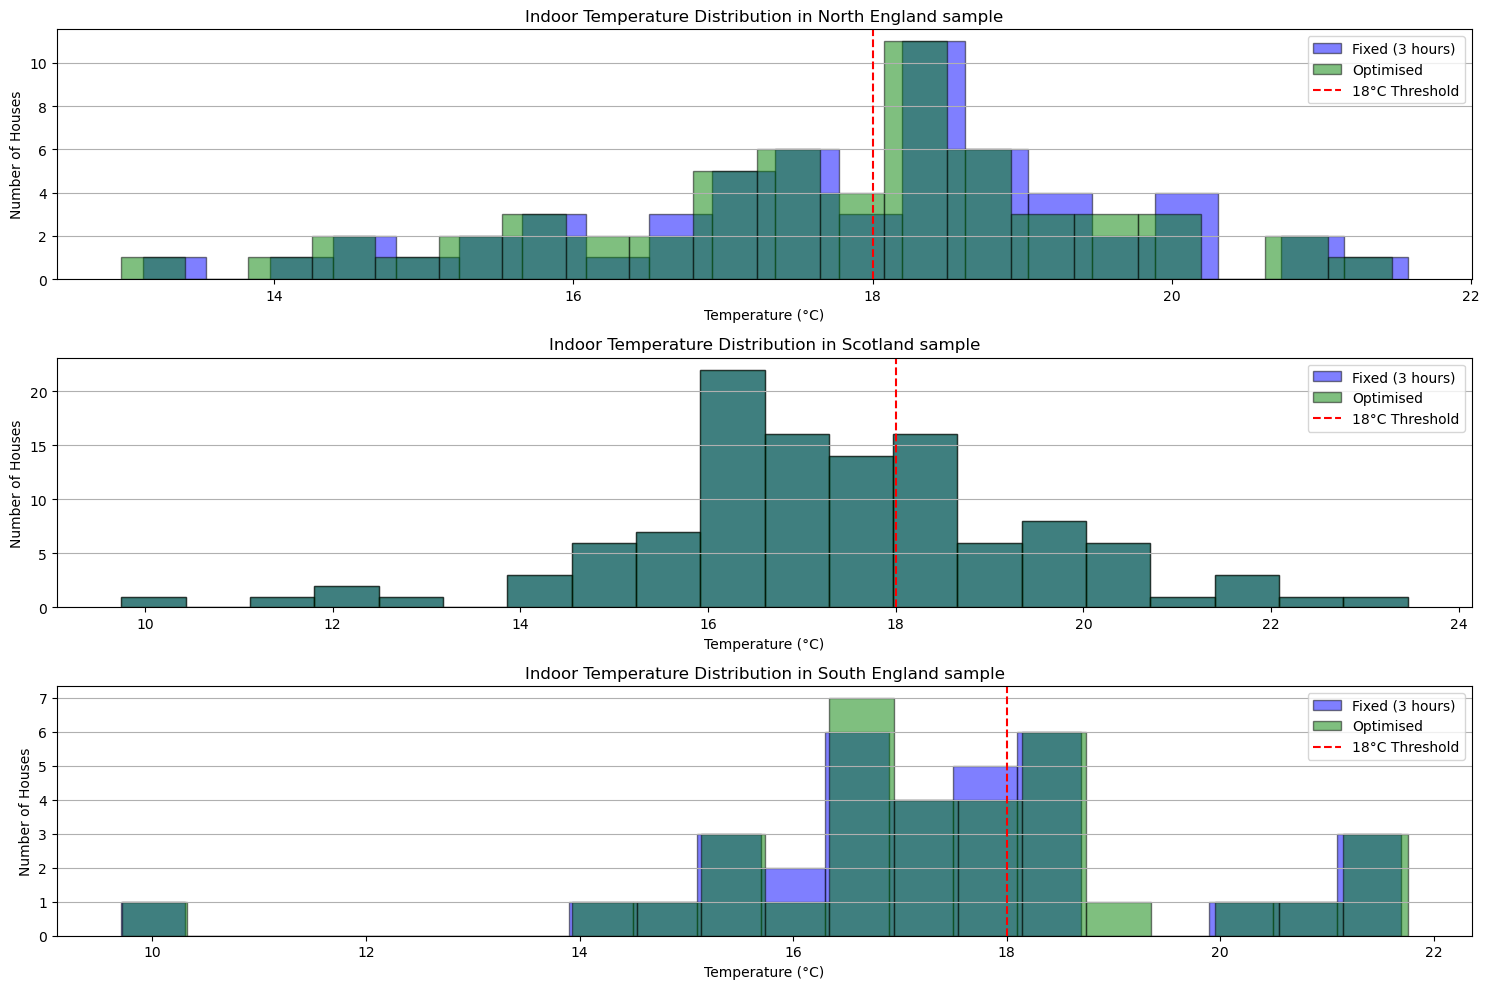

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the file
file_path = "temperature_evolution_no_heating_3.xlsx"
data = pd.read_excel(file_path)

# Define region and corresponding t values for optimised duration
optimised_t_columns = {
    'South England': 7,  # t=6 is the 8th column
    'Scotland': 8,       # t=7 is the 9th column
    'North England': 9   # t=8 is the 10th column
}

# Fixed duration (t=7)
fixed_t_column = data.columns[8]  # Column I corresponds to t=7, which is the 9th column

# Calculate temperatures for fixed duration
data['Fixed_Temperature'] = pd.to_numeric(data[fixed_t_column], errors='coerce')

# Initialize lists to store fixed and optimised temperatures by region
data['Optimised_Temperature'] = pd.Series(dtype=float)

# Calculate temperatures for optimised duration by region
for region, t_index in optimised_t_columns.items():
    region_data = data['Region_UK'] == region
    data.loc[region_data, 'Optimised_Temperature'] = pd.to_numeric(data.loc[region_data].iloc[:, t_index], errors='coerce')

# Plot histograms for each region
regions = data['Region_UK'].unique()
plt.figure(figsize=(15, 10))

for i, region in enumerate(regions):
    plt.subplot(len(regions), 1, i + 1)
    region_data = data[data['Region_UK'] == region]
    
    plt.hist(region_data['Fixed_Temperature'], bins=20, alpha=0.5, label='Fixed (3 hours)', color='blue', edgecolor='black')
    plt.hist(region_data['Optimised_Temperature'], bins=20, alpha=0.5, label='Optimised', color='green', edgecolor='black')
    plt.axvline(18, color='red', linestyle='--', label='18°C Threshold')
    plt.title(f'Indoor Temperature Distribution in {region} sample')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Number of Houses')
    plt.legend()
    plt.grid(axis='y')

plt.tight_layout()

# Save the plot to a PDF.pdf
plt.savefig('histo_comparis.pdf')


plt.show()


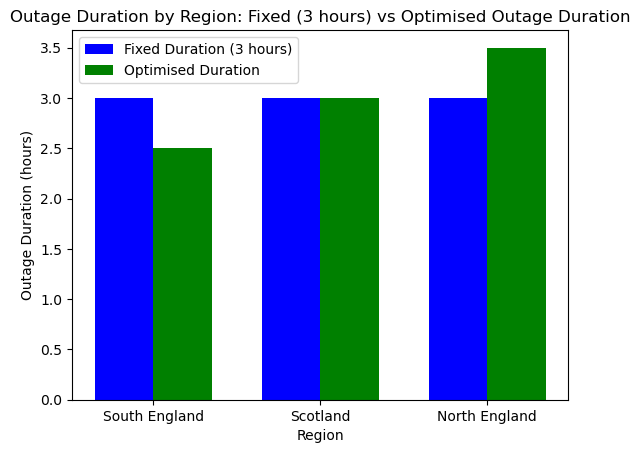

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Data
regions = ['South England', 'Scotland', 'North England']
fixed_duration = [3, 3, 3]
optimised_duration = [2.5, 3.0, 3.5]

# X-axis positions for the bars
x = np.arange(len(regions))

# Bar width
width = 0.35

# Create the bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, fixed_duration, width, label='Fixed Duration (3 hours)', color='blue')
bar2 = ax.bar(x + width/2, optimised_duration, width, label='Optimised Duration', color='green')

# Labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Outage Duration (hours)')
ax.set_title('Outage Duration by Region: Fixed (3 hours) vs Optimised Outage Duration')
ax.set_xticks(x)
ax.set_xticklabels(regions)
ax.legend()

# Save the plot as a PDF
plt.savefig("outage_duration.pdf", format='pdf')

# Display the chart
plt.show()


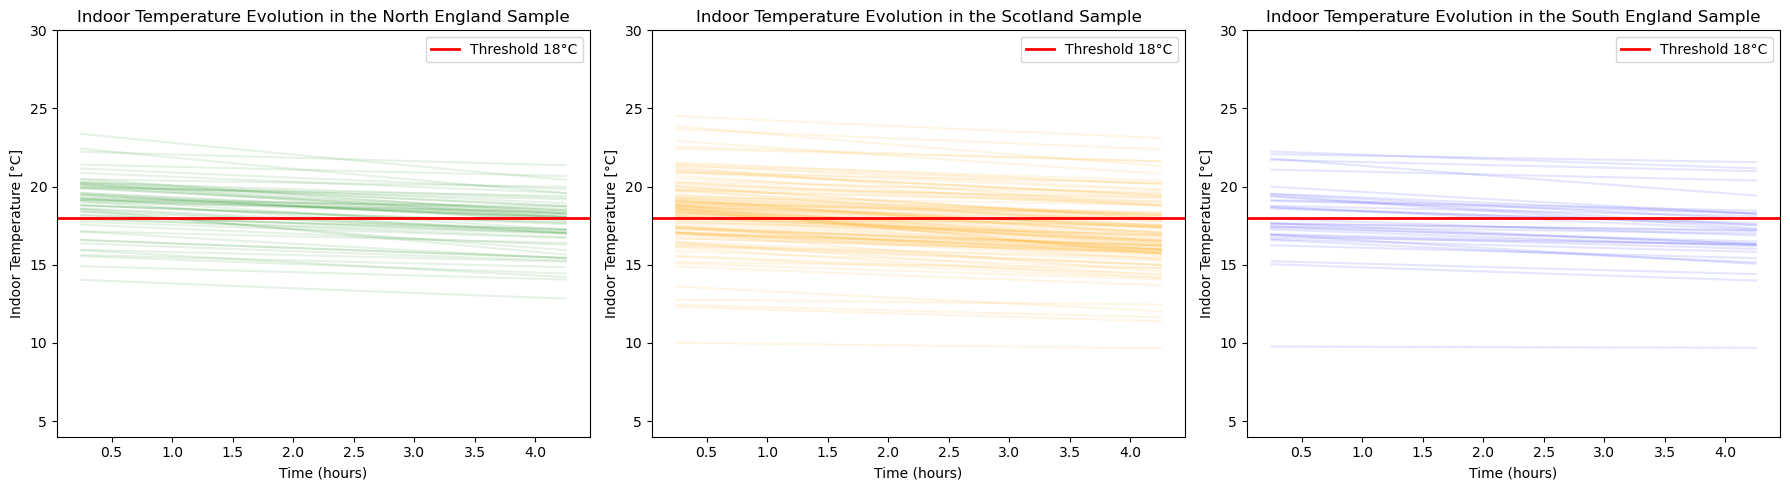

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the file
file_path = "temperature_evolution_no_heating_4.xlsx"
data = pd.read_excel(file_path)

# Unique regions in the dataset
regions = data['Region_UK'].unique()

# Define colours for each region
colours = {
    'North England': 'green',
    'Scotland': 'orange',
    'South England': 'blue'
}

# Create a figure with 3 subplots in a single row
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Iterate over each region and plot the temperature evolution
for i, region in enumerate(regions):
    # Filter data for the specific region
    region_data = data[data['Region_UK'] == region]
    
    # Plot each row of temperature data for the region
    for index, row in region_data.iterrows():
        # Time values are derived from the column indices
        time_values = (row.index[2:] - 0.5) / 2  # Convert to hours by dividing by 2
        axs[i].plot(time_values, row[2:], alpha=0.1, color=colours[region])  # Adjust alpha for transparency

    # Add a horizontal line at 18°C (Threshold)
    threshold_line = axs[i].axhline(y=18, color='red', linestyle='-', linewidth=2, label='Threshold 18°C')
    
    # Set title and labels
    axs[i].set_title(f'Indoor Temperature Evolution in the {region} Sample')
    axs[i].set_xlabel('Time (hours)')
    axs[i].set_ylabel('Indoor Temperature [°C]')
    axs[i].set_ylim([4, 30])  # Adjust y-axis limits as needed
    
    # Add legend
    axs[i].legend(loc='upper right')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the plot to a PDF 
plt.savefig('Temp_Evolution.pdf')

# Show the plot
plt.show()
